# PLS

In [95]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


(X_train, X_test, y_train, y_test) = skm.train_test_split(data.drop(['log_price','price'], axis=1),
                                                          data['log_price'],
                                                          test_size=0.2,
                                                          random_state=0)
feature_names = X_train.columns

PLS_mat = pd.DataFrame(columns = ['num_components', 'train_mse', 'test_mse'])
for n_components in range(1, 25):
    print(n_components)
    pls = PLSRegression(n_components=n_components, scale=True)
    pls.fit(X_train, y_train)

    y_train_pred = pls.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred)
    print("Training MSE:", train_mse)

    y_test_pred = pls.predict(X_test)

    test_mse = mean_squared_error(y_test, y_test_pred)
    print("Test MSE:", test_mse)
    PLS_mat.loc[len(PLS_mat.index)] = [n_components, train_mse, test_mse]
    print()

1
Training MSE: 0.2599696891191325
Test MSE: 0.2671640974993032

2
Training MSE: 0.2274670472260308
Test MSE: 0.2345232621326887

3
Training MSE: 0.22256158186588948
Test MSE: 0.22992773150623444

4
Training MSE: 0.2213965426659234
Test MSE: 0.22868326080057225

5
Training MSE: 0.2210154368244136
Test MSE: 0.228083675295849

6
Training MSE: 0.22089147765853054
Test MSE: 0.22782272528546899

7
Training MSE: 0.22076180909438073
Test MSE: 0.22772336174678487

8
Training MSE: 0.22069434447145037
Test MSE: 0.22782447074511067

9
Training MSE: 0.22065635003447684
Test MSE: 0.22788910859253642

10
Training MSE: 0.22060879861715046
Test MSE: 0.2278235276626328

11
Training MSE: 0.22051544213283825
Test MSE: 0.22753495560233536

12
Training MSE: 0.22033217114685033
Test MSE: 0.22754485856117324

13
Training MSE: 0.22026412586839464
Test MSE: 0.22756132422681283

14
Training MSE: 0.22025839269704597
Test MSE: 0.2275459411665261

15
Training MSE: 0.2202579108181394
Test MSE: 0.2275454998632868

1

In [99]:
PLS_mat[PLS_mat.test_mse == min(PLS_mat.test_mse)]

,num_components,train_mse,test_mse
10,11.0,0.220515,0.227535


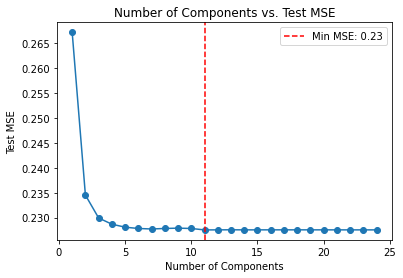

In [97]:
import matplotlib.pyplot as plt

plt.plot(PLS_mat.num_components, PLS_mat.test_mse, marker='o', linestyle='-')

min_mse = min(PLS_mat.test_mse)
min_components = PLS_mat.loc[PLS_mat.test_mse == min_mse, 'num_components'].values[0]

plt.axvline(x=min_components, color='red', linestyle='--', label=f'Min MSE: {min_mse:.2f}')

plt.xlabel('Number of Components')
plt.ylabel('Test MSE')
plt.title('Number of Components vs. Test MSE')
plt.legend()

plt.show()